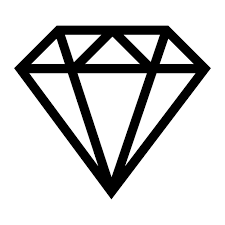

# <p style="font-family:newtimesroman; color:#8c2e5b; text-align:center; font-size:160%;" > Importing Libraries </p>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import metrics

In [2]:
data = pd.read_csv('/kaggle/input/diamondprices/DiamondsPrices.csv')

# <p style="font-family:newtimesroman; color:#8c2e5b; text-align:center; font-size:160%;" > Understanding The Data </p>

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
data.shape

(53940, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

# <p style="font-family:newtimesroman; color:#8c2e5b; text-align:center; font-size:160%;" > Statistical Mehtod and EDA </p>

In [8]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<AxesSubplot:ylabel='None'>

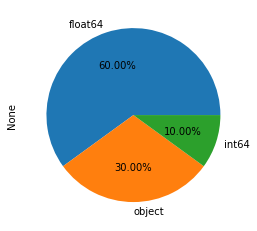

In [9]:
data.dtypes.value_counts().plot.pie(autopct='%0.2f%%')

In [10]:
bl_col = data.select_dtypes(include=('boolean')).columns
int_col = data.select_dtypes(include=('int')).columns
str_col = data.select_dtypes(include=('object')).columns
flt_col = data.select_dtypes(include=('float')).columns

In [11]:
print(bl_col, "********************* Boolean Columns **********************")
print(int_col, "******************** Integar Columns **********************")
print(str_col, "******************** String Columns ***********************")
print(flt_col, "******************** Float Columns ***********************")

Index([], dtype='object') ********************* Boolean Columns **********************
Index(['price'], dtype='object') ******************** Integar Columns **********************
Index(['cut', 'color', 'clarity'], dtype='object') ******************** String Columns ***********************
Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object') ******************** Float Columns ***********************


<AxesSubplot:xlabel='cut', ylabel='count'>

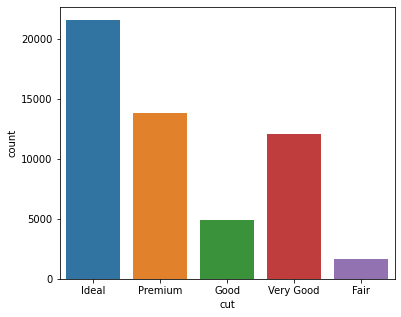

In [12]:
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='cut')

<AxesSubplot:xlabel='color', ylabel='count'>

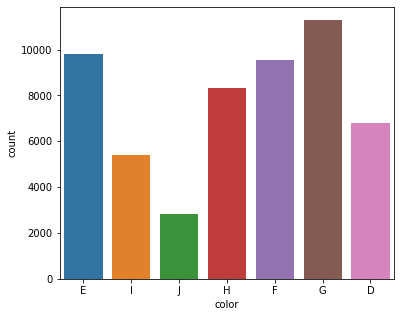

In [13]:
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='color')

Text(0.5, 1.0, 'Clarity')

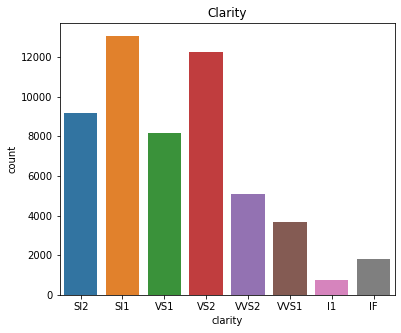

In [14]:
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='clarity')
plt.title("Clarity")

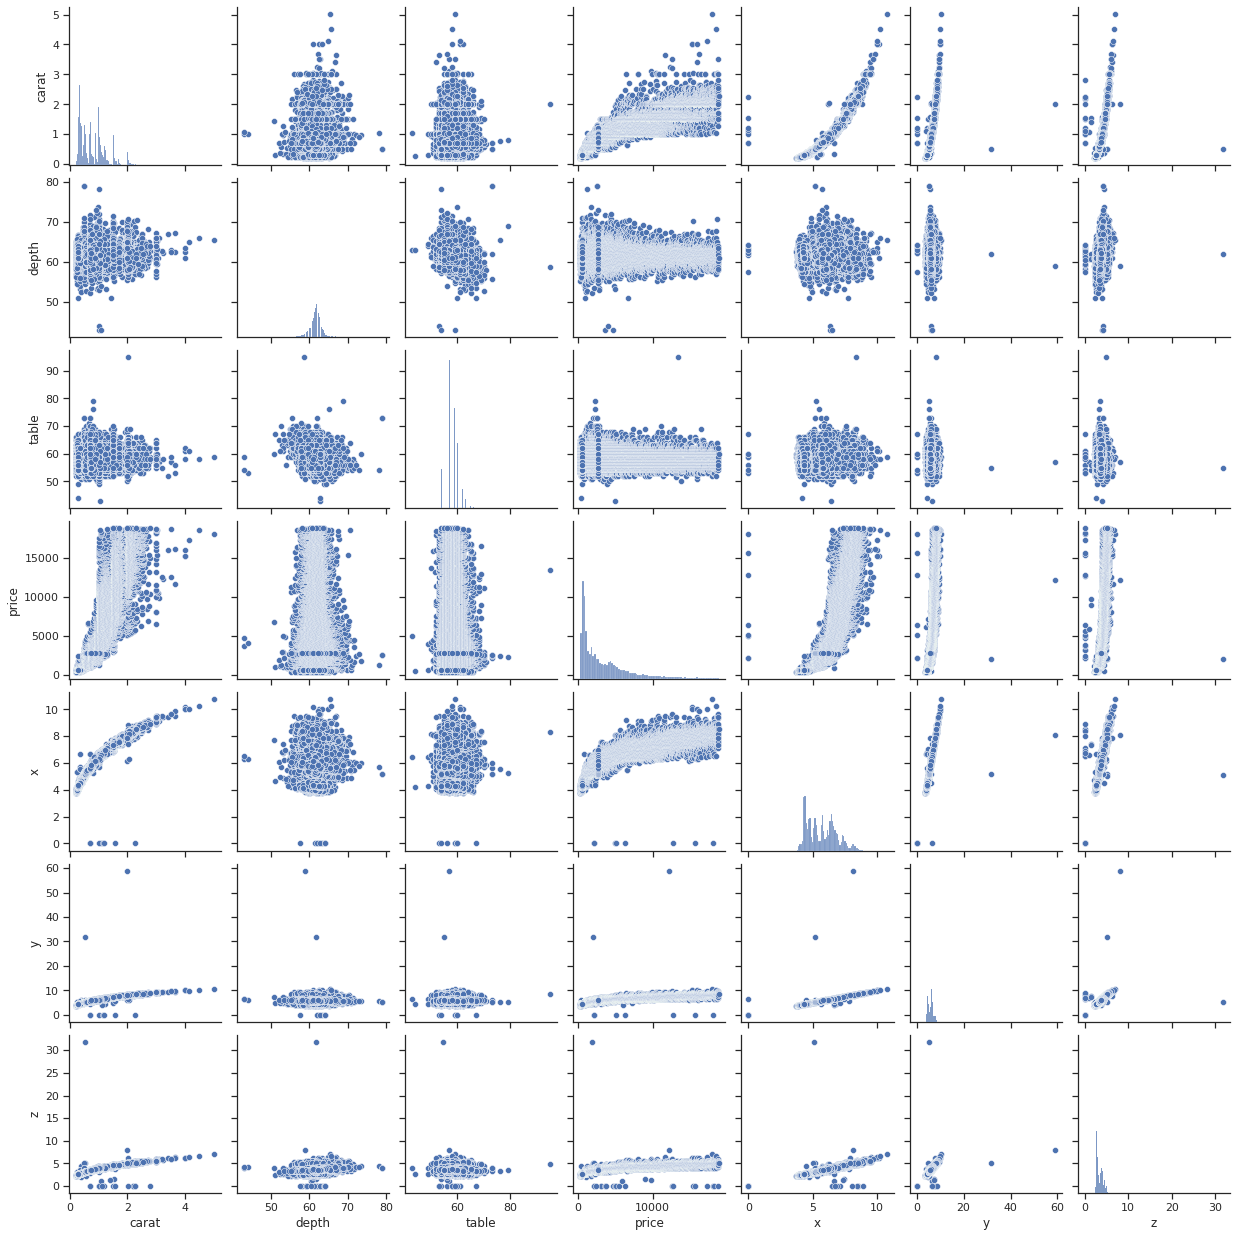

In [15]:
sns.set(style='ticks')
sns.pairplot(data, palette=('r','g'))
plt.show()

Text(0.5, 1.0, 'Daimond Color Impact on Price')

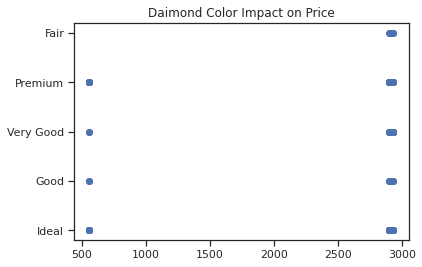

In [16]:
plt.scatter(list(data['price'][1000:1200]), list(data['cut'][1000:1200]))
plt.title("Daimond Color Impact on Price")

Text(0.5, 1.0, 'Daimond Color Impact on Price')

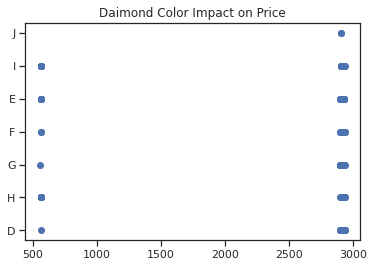

In [17]:
plt.scatter(list(data['price'][1000:1200]), list(data['color'][1000:1200]))
plt.title("Daimond Color Impact on Price")

Text(0.5, 1.0, 'Daimond Color Impact on Price')

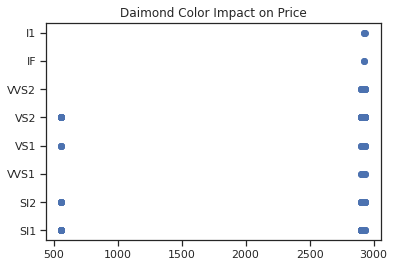

In [18]:
plt.scatter(list(data['price'][1000:1200]), list(data['clarity'][1000:1200]))
plt.title("Daimond Color Impact on Price")

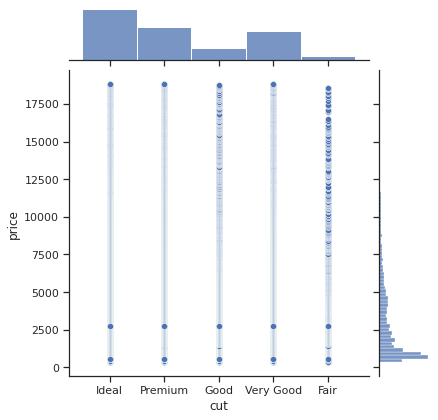

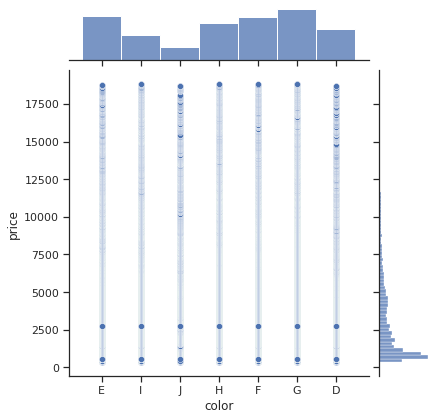

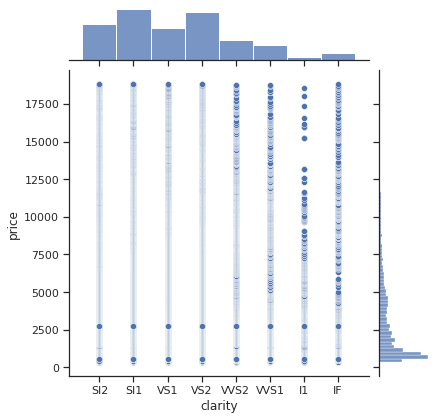

In [19]:
sns.jointplot(data=data, x='cut', y='price')
sns.jointplot(data=data, x='color', y='price')
sns.jointplot(data=data, x='clarity', y='price')


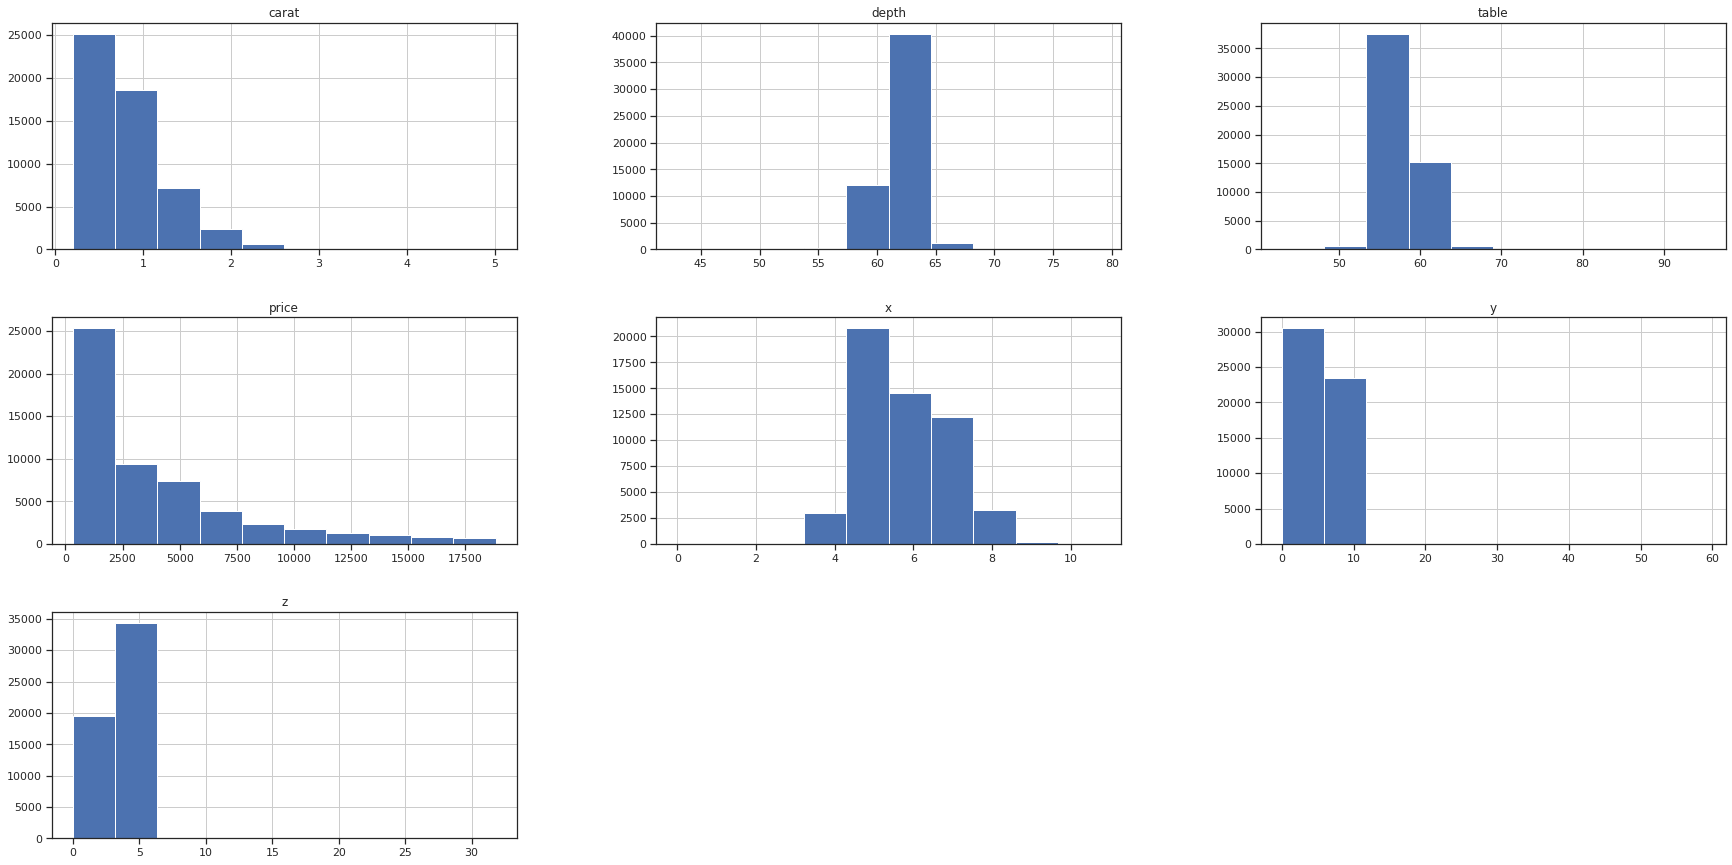

In [20]:
data.hist(figsize=(30,15))
plt.show()

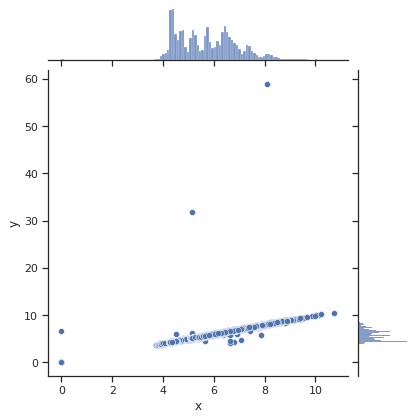

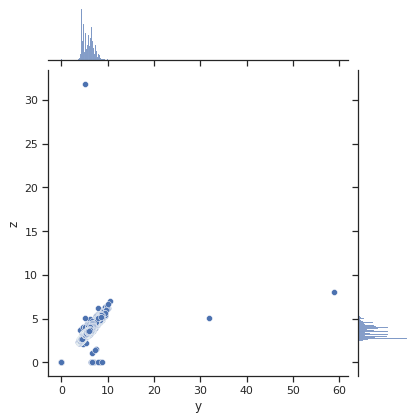

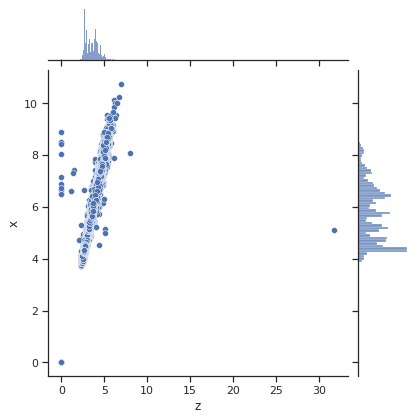

In [21]:
sns.jointplot(data=data, x='x', y='y')
sns.jointplot(data=data, x='y', y='z')
sns.jointplot(data=data, x='z', y='x')

# <p style="font-family:newtimesroman; color:#8c2e5b; text-align:center; font-size:160%;" > Data cleaning and Pre-processing transformations </p>

In [22]:
data.isnull()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False


In [23]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<AxesSubplot:>

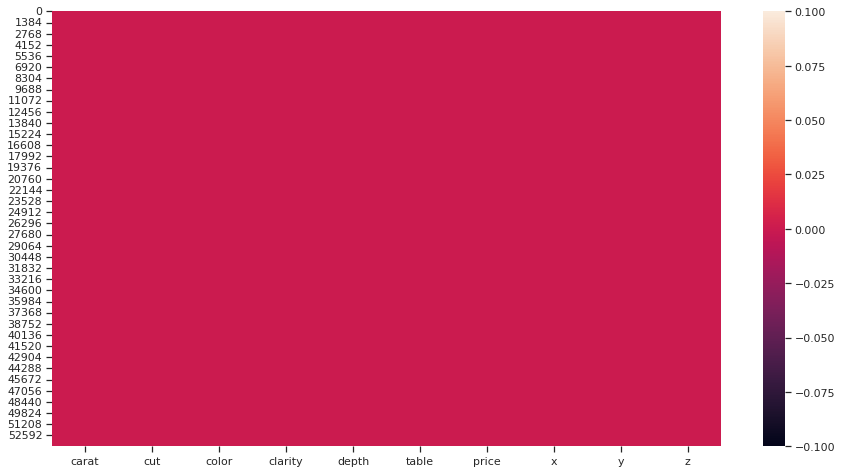

In [24]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.isnull())

In [25]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


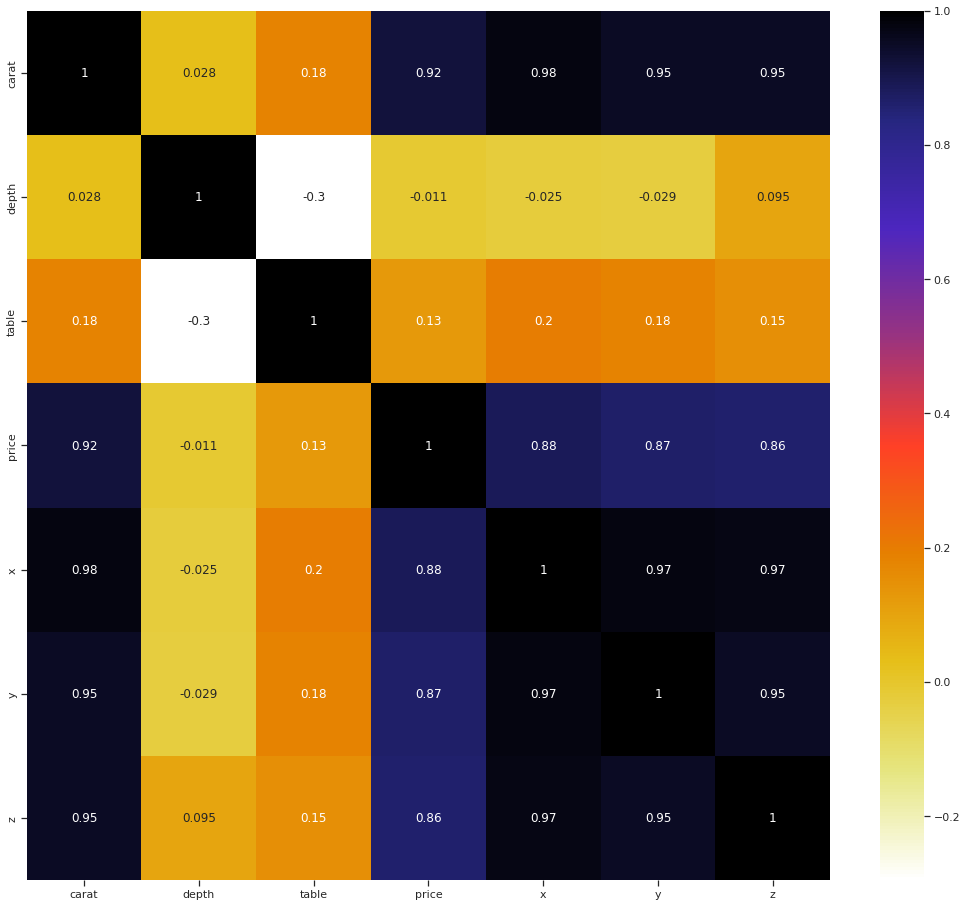

In [26]:
plt.figure(figsize=(18,16))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# <p style="font-family:newtimesroman; color:#8c2e5b; text-align:center; font-size:160%;" > LabelEncoding </p>

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [28]:
data.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [29]:
label_encoding = LabelEncoder()

In [30]:
for col in str_col:
    data[col] = label_encoding.fit_transform(data[col].astype('str'))

In [31]:
data.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31


In [32]:
x_data = data.drop('price', axis=True)

In [33]:
x_data.head(3)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31


In [34]:
y_data = data['price']

In [35]:
y_data.head(3)

0    326
1    326
2    327
Name: price, dtype: int64

In [36]:
print(x_data.count())
print("")
print(y_data.count())

carat      53940
cut        53940
color      53940
clarity    53940
depth      53940
table      53940
x          53940
y          53940
z          53940
dtype: int64

53940


# <p style="font-family:newtimesroman; color:#8c2e5b; text-align:center; font-size:160%;" > Train, Test and Validation </p>

##### Use scikit-learn to split into train-val-test (60-20-20)

In [37]:
x_train, x_val_test, y_train, y_val_test = train_test_split(x_data, y_data,test_size=0.4, random_state=1)

In [38]:
# Split the remaining observations into validation and test
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=1) 

# <p style="font-family:newtimesroman; color:#8c2e5b; text-align:center; font-size:160%;" > Linear Regression Model </p>

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lin_model = LinearRegression()

In [41]:
lin_model.fit(x_train, y_train)

LinearRegression()

In [42]:
predy = lin_model.predict(x_test)

In [43]:
predy

array([6551.61022768, 1727.37071888,  903.77230129, ..., -657.09594261,
       4725.9292487 , 3937.37379291])

In [44]:
lin_model.score(x_test, y_test)

0.8923646704626574

In [45]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': predy})
print(results)

       Actual    Predicted
11742    5073  6551.610228
47182    1836  1727.370719
43150    1389   903.772301
42161    1284   617.032746
46046    1730  3395.182874
...       ...          ...
28179     666  -575.555718
36140     928  1109.636148
37479     984  -657.095943
7584     4256  4725.929249
4887     3718  3937.373793

[10788 rows x 2 columns]


In [46]:
pred_val = lin_model.predict(x_val)

In [47]:
pred_val

array([10308.436988  ,   517.62167506,  -453.27555357, ...,
        5991.14515899,   628.87242899,  4872.92903338])

In [48]:
results = pd.DataFrame({'Actual': y_test, 'Predicted Validation': pred_val})
print(results)

       Actual  Predicted Validation
11742    5073          10308.436988
47182    1836            517.621675
43150    1389           -453.275554
42161    1284           8529.737780
46046    1730           1483.367873
...       ...                   ...
28179     666           6457.551909
36140     928          11841.603381
37479     984           5991.145159
7584     4256            628.872429
4887     3718           4872.929033

[10788 rows x 2 columns]


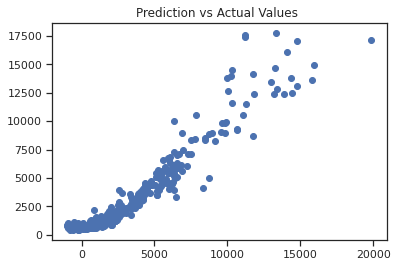

In [49]:
plt.title('Prediction vs Actual Values ')
plt.scatter(predy[:300], y_test[:300])

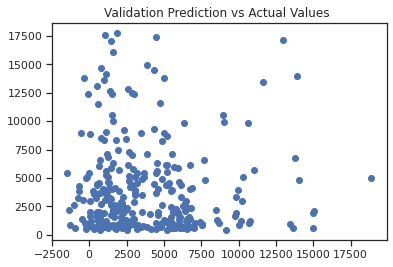

In [50]:
plt.title('Validation Prediction vs Actual Values ')
plt.scatter(pred_val[:300], y_test[:300])

In [51]:
# mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predy)

1659900.654185573

In [52]:
mean_squared_error(y_test, predy, squared = False)

1288.3713184426192

In [53]:
mean_squared_error(pred_val, y_val, squared = False)

1365.1584772855886

In [54]:
mean_squared_error(pred_val, y_val)

1863657.668104707

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, predy)

0.8923646704626574

In [56]:
from sklearn.metrics import r2_score
r2_score(y_val, pred_val)

0.8782058737935639

In [57]:
# r2 = r2_score(y_test, predy)
# n = len(y_test)
# k = len(x_test.columns)
# # calculate adjusted r2 score
# adj_r2_score = 1-(((1-r2)*(n-1))/(n-k-1))

In [58]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree = 3)
# X_degree3 = poly.fit_transform(x_data)

In [59]:
# X_train, X_val_test, y_train, Y_val_test = train_test_split(X_degree3, y_data, test_size=0.15, random_state=42)
# degree3_model = LinearRegression()
# degree3_model.fit(X_train, y_train)
# y_pred = degree3_model.predict(X_test)

In [60]:
# poly = PolynomialFeatures(degree = 3)
# X_val_degree3 = poly.fit_transform(x_val_test)

In [61]:
# X_train, X_test, y_train, y_test = train_test_split(X_val_test, Y_val_test, test_size=0.15, random_state=42)
# degree3_model = LinearRegression()
# degree3_model.fit(X_train, y_train)
# y_pred_val = degree3_model.predict(X_test)

In [62]:
# r2_score(y_test, y_pred)

In [63]:
# r2_score(y_test, y_pred_val)

In [64]:
# plt.scatter(y_test, y_pred)

In [65]:
# plt.scatter(y_test, y_pred_val)

In [66]:
# print('Mean absolute error',mean_squared_error(y_test, y_pred))

In [67]:
# print('Mean squared error :', mean_squared_error(y_test, y_pred, squared = False))

In [68]:
# print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [69]:
# print('Mean absolute error val:',mean_squared_error(y_test, y_pred_val))
# print('Mean squared error val:', mean_squared_error(y_test, y_pred_val, squared = False))
# print('Root mean squared error val:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_val)))